# Anticipez les besoins en consommation électrique de bâtiments de la ville de Seattle

Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, Ce projet s’intéresse de près aux émissions des bâtiments non destinés à l’habitation de la ville de Seattle.  
Des relevés minutieux ont été effectués en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, nous voulons tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.  
Nous cherchons également à évaluer l’intérêt de l’ENERGY STAR Score pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement.  

Dans cette première partie, nous allons réaliser une courte analyse exploratoire et nous allons nettoyer au fure et à mesure, les données si besoin. L'objectif sera de déterminer les variables pertinentes (variables target) ou d'en créer de nouvelles à partir de celles existantes (feature engineering).



## Sommaire:  
* [1. Analyse exploratoire](#1.)  
  * [1.1. Chargement et exploration des données](#1.1.)
  * [1.2. Etude de ressemblance entre variables](#1.2.) 
  * [1.3. décompactage et normalisation des variables imbriquées ](#1.3.)  
  * [1.4. Concaténation des deux dataframes ](#1.4.)  
* [2. Nettoyage des données](#2.) 
  * [2.1. Outliers](#2.1)
  * [2.2. YearsENERGYSTARCertified](#2.2)
  * [2.3. BuildingType](#2.3)
  * [2.4. PrimaryPropertyType](#2.4) 
  * [2.5. YearBuilt](#2.5)
  * [2.6. Electricity / NaturalGas](#2.6)
  * [2.7. SiteEUIWN(kBtu/sf) - SourceEUIWN(kBtu/sf) - SiteEnergyUseWN(kBtu) ](#2.7)
  * [2.8. Neighborhood](#2.8)
  * [2.9. Les variables quantitatives](#2.9)
  * [2.10. Vérification des lignes vides](#2.10)
* [3. Analyse statistique](#3.) 
  * [3.1. Analyse univariée](#3.1) 
  * [3.2. Analyse multivariée](#3.2) 

## 1. Analyse exploratoire <a class="anchor" id="1."></a>  

### 1.1. Chargement et exploration des données <a class="anchor" id="1.1."></a>  


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import my_module

#### a) Exploration des données collectées en 2015

In [2]:
df_2015 = pd.read_csv ('2015-building-energy-benchmarking.csv')
df_2015.shape

(3340, 47)

In [3]:
pd.set_option('isplay.max_columns', 47)
df_2015.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [4]:
my_module.variable_survey(df_2015)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,OSEBuildingID,int64,3340,0.0 %
1,DataYear,int64,1,0.0 %
2,BuildingType,object,7,0.0 %
3,PrimaryPropertyType,object,27,0.0 %
4,PropertyName,object,3287,0.0 %
5,TaxParcelIdentificationNumber,object,3245,0.06 %
6,Location,object,3298,0.0 %
7,CouncilDistrictCode,int64,7,0.0 %
8,Neighborhood,object,13,0.0 %
9,YearBuilt,int64,113,0.0 %


<AxesSubplot:>

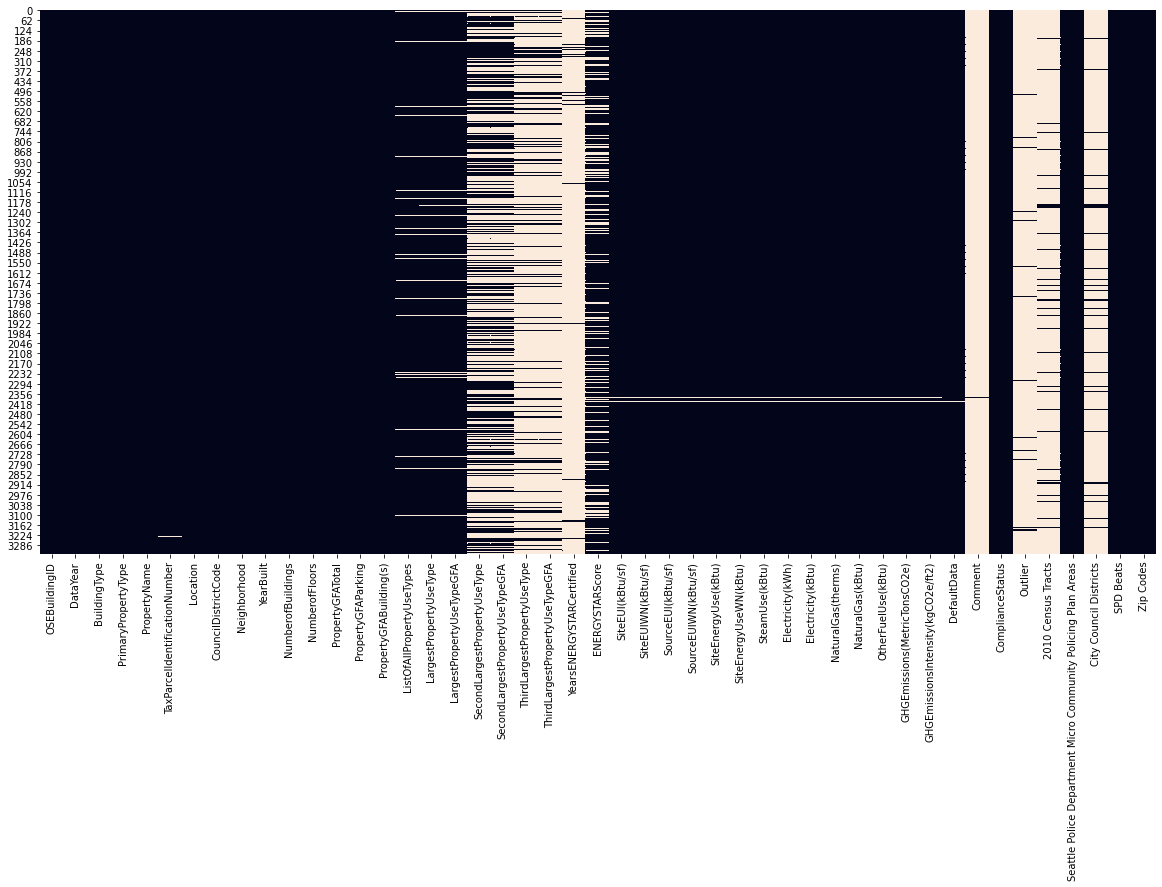

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(df_2015.isna(),cbar=False)

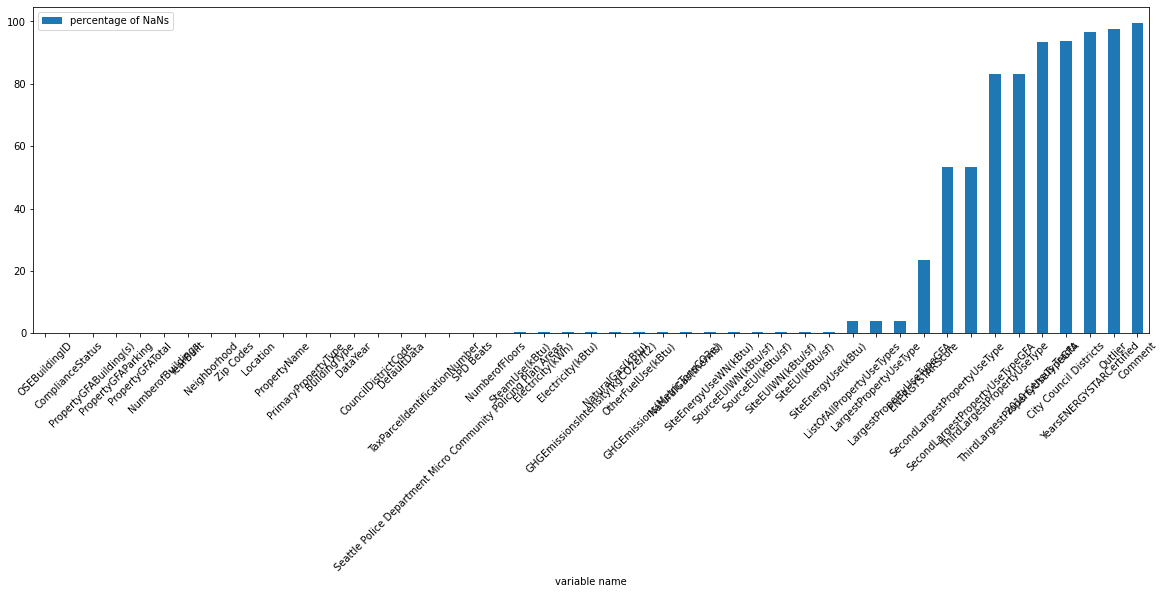

In [6]:
my_module.nans_df(df_2015)

#### b) Exploration des données collectées en 2016

In [7]:
df_2016=pd.read_csv('2016-building-energy-benchmarking.csv')
df_2016.shape

(3376, 46)

In [8]:
pd.set_option('isplay.max_columns', 46)
df_2016.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [9]:
my_module.variable_survey(df_2016)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,OSEBuildingID,int64,3376,0.0 %
1,DataYear,int64,1,0.0 %
2,BuildingType,object,8,0.0 %
3,PrimaryPropertyType,object,24,0.0 %
4,PropertyName,object,3362,0.0 %
5,Address,object,3354,0.0 %
6,City,object,1,0.0 %
7,State,object,1,0.0 %
8,ZipCode,float64,55,0.47 %
9,TaxParcelIdentificationNumber,object,3268,0.0 %


<AxesSubplot:>

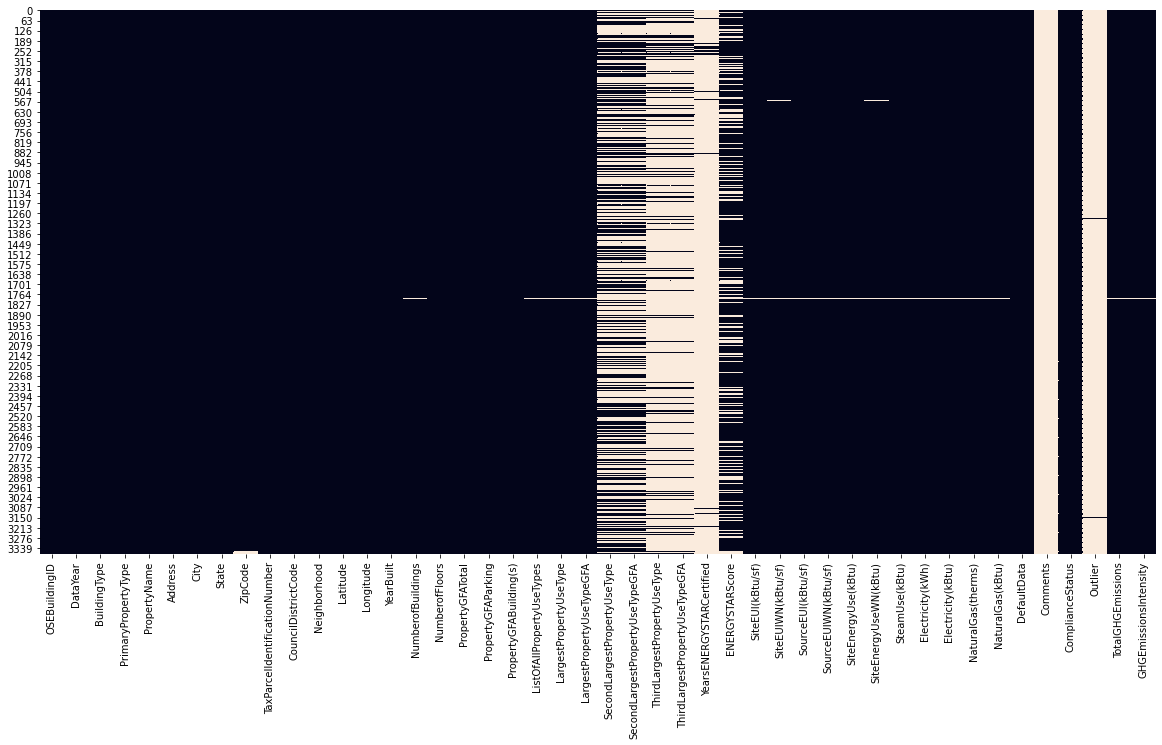

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df_2016.isna(),cbar=False)

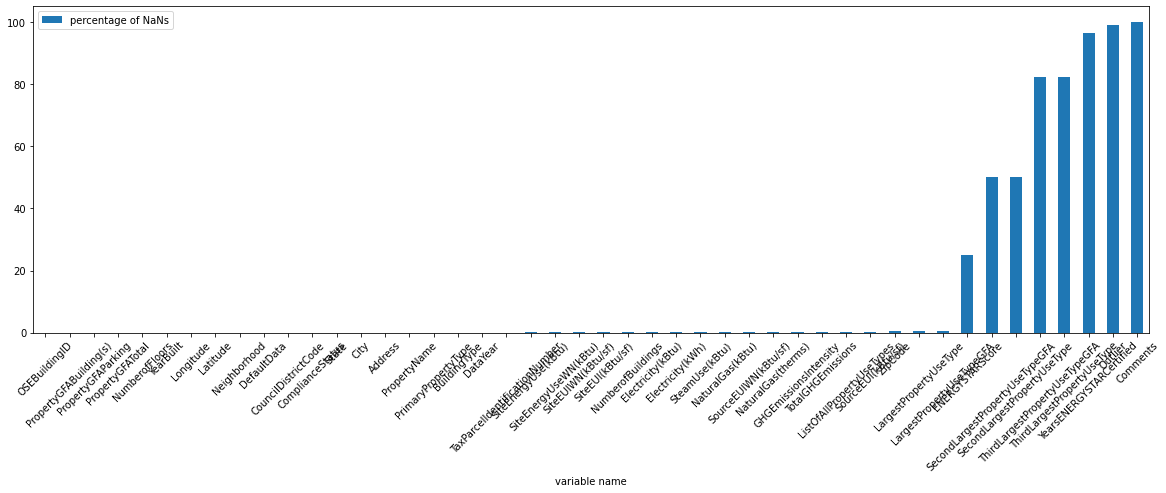

In [11]:
my_module.nans_df(df_2016)

In [12]:
dataset_dict={"df_2016":df_2016, "df_2015":df_2015}
my_module.dataframe_survey(dataset_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,df_2016,"(3376,46)",19952,12.85 %,0,0.0 %
1,df_2015,"(3340,47)",26512,16.89 %,0,0.0 %


   ### Remarques   
   - Nous remarquons que les datasets ne contiennent pas beaucoup de données manquantes (13% pour df_2016 et 17% pour df_2015)  
   - Ya pas de lignes redandantes pour les deux df.  
   - Nous remarquons qu'il y a des colonnes communes entre les deux df et d'autres qui sont spécifiques pour chaque df. Dans la suite, nous allons faire une analyse de l'intersection des colonnes entre les deux datasets. Le but c'est d'étudier la possibilité de concaténer les deux datasets. 

### 1.2. Etudes de ressemblance entre variables <a class="anchor" id="1.2."></a>  

In [13]:
#trouver les colonnes communes entre les deux df
col_2015 = df_2015.columns.to_list()
col_2016 = df_2016.columns.to_list()
commun_cols = list(set(col_2015) & set(col_2016))
len(commun_cols)

37

In [14]:
#trouver les colonnes qui sont présents dans df_2015 et non présents dans df_2016
extra_cols_2015 = [item for item in col_2015 if item not in col_2016]
extra_cols_2015

['Location',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

In [15]:
#trouver les colonnes qui sont présents dans df_2016 et non présents dans df_2015
extra_cols_2016 = [item for item in col_2016 if item not in col_2015]
extra_cols_2016

['Address',
 'City',
 'State',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Comments',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

### Remarques:  
-Nous remarquons qu'il y a des colonnes qui sont à prioris les mêmes mais leur noms est différents:  
  - couple 1: 'GHGEmissions(MetricTonsCO2e)'= 'TotalGHGEmissions'  
  - couple 2: 'GHGEmissionsIntensity(kgCO2e/ft2)'= 'GHGEmissionsIntensity'  
  - couple 3: 'Comment' = 'Comments'  
  - couple 4: 'Zip Codes' = 'ZipCode'  
 
 Vérifions, couple par couple, la discription statistique (en utilisant la fonction describe()) et les valeurs des variables.

#### Couple 1: 'GHGEmissions(MetricTonsCO2e)' / 'TotalGHGEmissions'
Green House Gaz

In [16]:
print(f"Description de la variable GHGEmissions(MetricTonsCO2e) 2015 : \n\n",df_2015['GHGEmissions(MetricTonsCO2e)'].describe(),
     f"\n\nDescription de la variable TotalGHGEmissions 2016 : \n\n", df_2016['TotalGHGEmissions'].describe())

Description de la variable GHGEmissions(MetricTonsCO2e) 2015 : 

 count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64 

Description de la variable TotalGHGEmissions 2016 : 

 count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64


/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


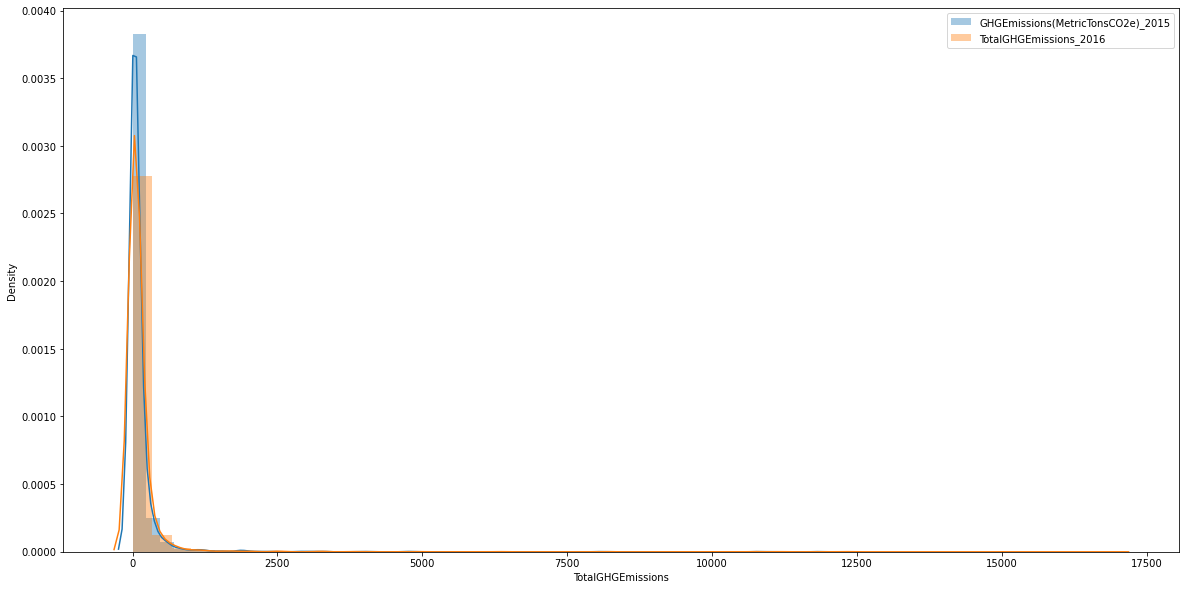

In [17]:
#comparer les deux variables par leur distributions
plt.figure(figsize=(20,10))
sns.distplot(df_2015['GHGEmissions(MetricTonsCO2e)'], label='GHGEmissions(MetricTonsCO2e)_2015')
sns.distplot(df_2016['TotalGHGEmissions'], label='TotalGHGEmissions_2016')
plt.legend()

**Conclusion:** Les deux variables semblent avoir la même échelle de valeurs. Nous allons donc just les renommer pour pouvoir après les merger. 

In [18]:
df_2015 = df_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions'})

#### Couple 2: 'GHGEmissionsIntensity(kgCO2e/ft2)'= 'GHGEmissionsIntensity' 

In [19]:
print (f"Description de la variable 'GHGEmissionsIntensity(kgCO2e/ft2) 2015: '\n\n", df_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe(),
      f"\n\nDescription de la variable 'GHGEmissionsIntensity 2016: '\n\n", df_2016['GHGEmissionsIntensity'].describe() )

Description de la variable 'GHGEmissionsIntensity(kgCO2e/ft2) 2015: '

 count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64 

Description de la variable 'GHGEmissionsIntensity 2016: '

 count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64


/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


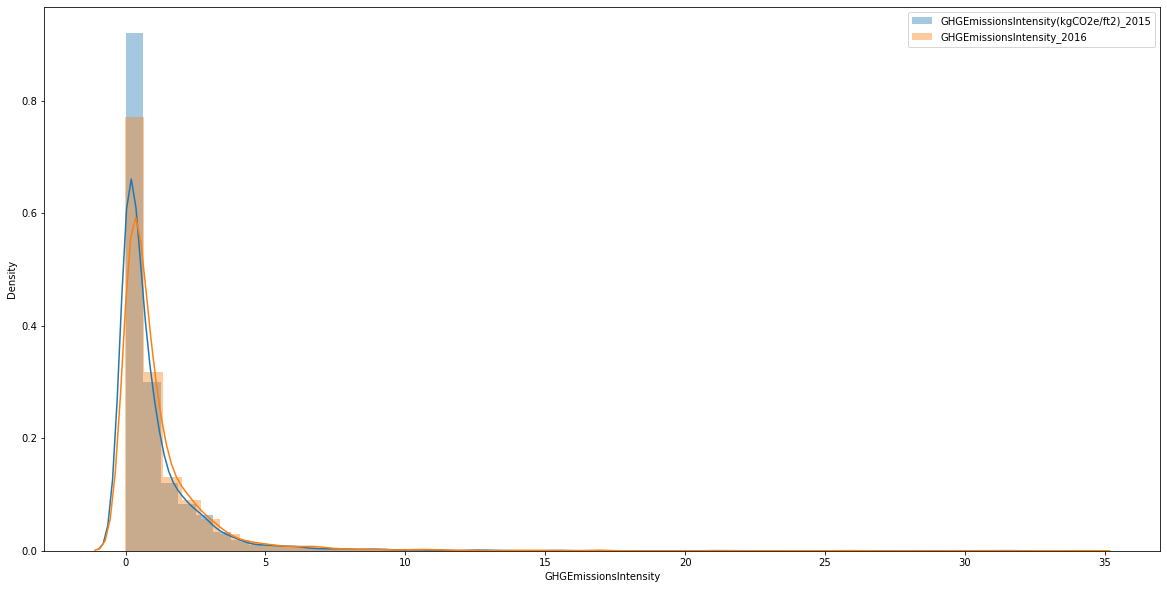

In [20]:
#comparer les deux variables par leur distributions
plt.figure(figsize=(20,10))
sns.distplot(df_2015['GHGEmissionsIntensity(kgCO2e/ft2)'], label='GHGEmissionsIntensity(kgCO2e/ft2)_2015')
sns.distplot(df_2016['GHGEmissionsIntensity'], label='GHGEmissionsIntensity_2016')
plt.legend()

**Conclusion:** Les deux variables semblent avoir la même échelle de valeurs. Nous allons donc just les renommer pour pouvoir après les merger. 

In [21]:
df_2015 = df_2015.rename(columns={'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity'})

#### Couple 3: 'Comment'= 'Comments' 

In [22]:
print (f"Description de la variable 'Comment 2015: '\n\n", df_2015['Comment'].describe(),
      f"\n\nDescription de la variable 'Comments 2016: '\n\n", df_2016['Comments'].describe() )

Description de la variable 'Comment 2015: '

 count                                                    13
unique                                                   13
top       Recent energy efficiency upgrades include repl...
freq                                                      1
Name: Comment, dtype: object 

Description de la variable 'Comments 2016: '

 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Comments, dtype: float64


#### Remarque:  
 - Nous remarquons que les deux variables n'ont pas le même type (object en 2015 - float en 2016).  
 - C'est inutile de convertir le type de l'un des variables ensuite de le renommer, puisque ces deux variables sont presque vides (selon variable_survey(): en 2015 -->  99,61% NaN , en 2016 --> 100% NaN)  
   --> nous décidons donc de les supprimer


In [23]:
df_2016= df_2016.drop(['Comments'], axis = 1)
df_2015=df_2015.drop(['Comment'], axis = 1)

#### Couple 4 : 'Zip Codes' = 'ZipCode' 

Nous allons étudier la pressemblance entre ces deux variables plus tard.

Après avoir étudier la ressemblances des variables non communes entre df_2015 et df_2016, nous allons re-vérifier la liste des variables communes. 

In [24]:
col_2015 = df_2015.columns.to_list()
col_2016 = df_2016.columns.to_list()
extra_cols_2015 = [item for item in col_2015 if item not in col_2016]
extra_cols_2016 = [item for item in col_2016 if item not in col_2015]
print('extra_cols_2015 : \n\n', extra_cols_2015)
print('\nextra_cols_2016 : \n\n', extra_cols_2016)

extra_cols_2015 : 

 ['Location', 'OtherFuelUse(kBtu)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes']

extra_cols_2016 : 

 ['Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude']


## 1.3. Ressortir les variables imbriquées  <a class="anchor" id="1.3."></a>    
  
  Nous remarquons que les extra-variables dans df_2016 sont des informations qui concernent la localisation (Location en anglais). Vérifions ceci en affichant les valeurs de "Location" dans df_2015.

In [25]:
pd.set_option("max_colwidth", 1000)
df_2015['Location']

0         {'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
1           {'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{"address": "724 PINE ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
2          {'latitude': '47.61334897', 'longitude': '-122.33769944', 'human_address': '{"address": "1900 5TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
3        {'latitude': '47.61421585', 'longitude': '-122.33660889', 'human_address': '{"address": "620 STEWART ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
4           {'latitude': '47.6137544', 'longitude': '-122.3409238', 'human_address': '{"address": "401 LENORA ST", "city": "SEATTLE", "state": "WA", "zip": "98121"}'}
                                                                                     ...                                                                             

#### Remarque :  
On remarque que les données de localisation pour le jeu de données de 2015 sont "compactées" dans une sorte de double dictionnaire. Nous allons donc travailler cette variable pour extraire chacune des variables imbriquées (feature engineering)

In [26]:
#applatir 'Location' et créer d'autre colonnes contenant les variables imbriquées
import ast
df_2015['Location'] = [ast.literal_eval(str(item)) for index, item in df_2015.Location.iteritems()]
df_2015 = pd.concat([df_2015.drop(['Location'], axis=1), df_2015['Location'].apply(pd.Series)], axis=1)
df_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,...,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,latitude,longitude,human_address
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,...,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,"{""address"": ""405 OLIVE WAY"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}"
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,...,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,"{""address"": ""724 PINE ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}"
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,...,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,"{""address"": ""1900 5TH AVE"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}"
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,...,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,"{""address"": ""620 STEWART ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98101""}"
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,...,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,"{""address"": ""401 LENORA ST"", ""city"": ""SEATTLE"", ""state"": ""WA"", ""zip"": ""98121""}"


In [27]:
#applatir la variable 'human_address'
df_2015['human_address'] = [ast.literal_eval(str(item)) for index, item in df_2015.human_address.iteritems()]
df_2015['human_address'].apply(pd.Series)

,address,city,state,zip
0,405 OLIVE WAY,SEATTLE,WA,98101
1,724 PINE ST,SEATTLE,WA,98101
2,1900 5TH AVE,SEATTLE,WA,98101
3,620 STEWART ST,SEATTLE,WA,98101
4,401 LENORA ST,SEATTLE,WA,98121
...,...,...,...,...
3335,321 10TH AVE S,SEATTLE,WA,98104
3336,4123 12TH AVE NE,SEATTLE,WA,98105
3337,2030 8TH AVE,SEATTLE,WA,98121
3338,3801 NE 77TH ST,SEATTLE,WA,98115


In [28]:
#ajouter de nouvelles colonnes contenant les variables décompactées
df_2015 = pd.concat([df_2015.drop(['human_address'], axis=1), df_2015['human_address'].apply(pd.Series)], axis=1)
df_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,latitude,longitude,address,city,state,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,...,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,...,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,...,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,...,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,...,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


In [29]:
#re-verifier l'extra variables (non communes) pour chaque df
col_2015 = df_2015.columns.to_list()
col_2016 = df_2016.columns.to_list()
extra_cols_2015 = [item for item in col_2015 if item not in col_2016]
extra_cols_2016 = [item for item in col_2016 if item not in col_2015]
print('extra_cols_2015 : \n\n', extra_cols_2015)
print('\nextra_cols_2016 : \n\n', extra_cols_2016)

extra_cols_2015 : 

 ['OtherFuelUse(kBtu)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes', 'latitude', 'longitude', 'address', 'city', 'state', 'zip']

extra_cols_2016 : 

 ['Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude']


Nous allons maintenant renommer les variables qui étaient imbriquées

In [30]:
df_2015 = df_2015.rename(columns={'address':'Address',
                                 'city':'City',
                                 'state':'State',
                                 'latitude':'Latitude',
                                 'longitude':'Longitude'})

In [31]:
#re-verifier l'extra variables (non communes) pour chaque df
col_2015 = df_2015.columns.to_list()
col_2016 = df_2016.columns.to_list()
extra_cols_2015 = [item for item in col_2015 if item not in col_2016]
extra_cols_2016 = [item for item in col_2016 if item not in col_2015]
print('extra_cols_2015 : \n\n', extra_cols_2015)
print('\nextra_cols_2016 : \n\n', extra_cols_2016)

extra_cols_2015 : 

 ['OtherFuelUse(kBtu)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes', 'zip']

extra_cols_2016 : 

 ['ZipCode']


### Conclusion:  
Vérifions maintenant la possibilité de ressemblance de df_2015[zip] et df_2016[ZipCode] d'une part, et de df_2015[Zip Codes] et df_2016[ZipCode] d'autre part.



In [32]:
print(f'description de zip\n\n',df_2015['zip'].describe())
print(f'\n\ndescription de ZipCode\n\n',df_2016['ZipCode'].describe())

description de zip

 count      3340
unique       28
top       98109
freq        300
Name: zip, dtype: object


description de ZipCode

 count     3360.000000
mean     98116.949107
std         18.615205
min      98006.000000
25%      98105.000000
50%      98115.000000
75%      98122.000000
max      98272.000000
Name: ZipCode, dtype: float64


#### Remarque:  
Nous constatons que que 'zip' et 'ZipCode' n'ont pas le même type (object/float). Nous allons donc convertir le type du object vers float.

In [33]:
#conversion du type
df_2015['zip'] = df_2015['zip'].map(lambda x: float(x))
df_2015['zip'].describe()

count     3340.000000
mean     98116.737425
std         16.795145
min      98101.000000
25%      98105.000000
50%      98115.000000
75%      98122.000000
max      98199.000000
Name: zip, dtype: float64

In [34]:
# créer un liste contenant les batiments en commun entre 2015 et 2016
id_2015= df_2015['OSEBuildingID'].values
id_2016= df_2016['OSEBuildingID'].values
id_commun_list= [item for item in id_2015 if item in id_2016]
id_commun_list

[1,
 2,
 3,
 5,
 8,
 9,
 10,
 11,
 12,
 13,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 40,
 41,
 46,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 62,
 63,
 65,
 66,
 67,
 68,
 69,
 70,
 73,
 77,
 82,
 84,
 85,
 86,
 87,
 89,
 95,
 96,
 98,
 100,
 102,
 103,
 104,
 106,
 107,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 125,
 127,
 130,
 131,
 132,
 136,
 137,
 138,
 139,
 140,
 144,
 145,
 147,
 148,
 163,
 167,
 168,
 169,
 170,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 182,
 183,
 185,
 187,
 189,
 190,
 194,
 195,
 197,
 198,
 200,
 205,
 209,
 211,
 212,
 214,
 215,
 216,
 217,
 220,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 237,
 238,
 239,
 241,
 242,
 243,
 244,
 245,
 247,
 248,
 249,
 250,
 257,
 260,
 261,
 263,
 264,
 265,
 267,
 268,
 273,
 274,
 276,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


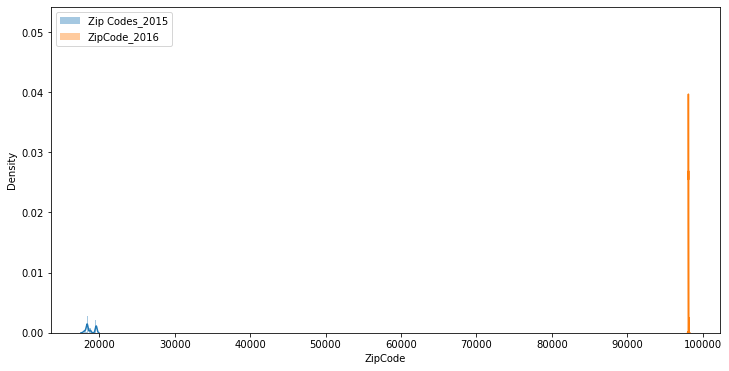

In [35]:
#comparer les distributions zip codes en 2015 et zipcode en 2016
plt.figure(figsize=(12,6))
sns.distplot(df_2015['Zip Codes'], label='Zip Codes_2015')
sns.distplot(df_2016['ZipCode'], label='ZipCode_2016')
plt.legend()

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


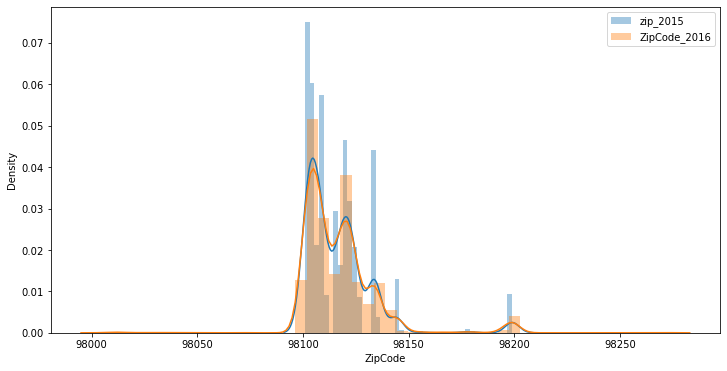

In [36]:
#comparer les distributions zip en 2015 et zipcode en 2016
plt.figure(figsize=(12,6))
sns.distplot(df_2015['zip'], label='zip_2015')
sns.distplot(df_2016['ZipCode'], label='ZipCode_2016')
plt.legend()

### Conclusion  
Nous constatons donc, d'après les distributions ci-dessus, que ZipCode dans 2016 et zip dans 2015 représentent presque la même variable (leurs distributions sont presque superposées). Nous allons donc leur attribuer le même nom et supprimer Zip Codes dans df_2015 puisqu'elle n'a pas d'équivalent dans df_2016. 

In [37]:
#renommer la variable ZipCode dans df_2016
df_2016 = df_2016.rename(columns={'ZipCode':'zip'})

In [38]:
#re-verifier l'extra variables (non communes) pour chaque df
col_2015 = df_2015.columns.to_list()
col_2016 = df_2016.columns.to_list()
extra_cols_2015 = [item for item in col_2015 if item not in col_2016]
extra_cols_2016 = [item for item in col_2016 if item not in col_2015]
print('extra_cols_2015 : \n\n', extra_cols_2015)
print('\nextra_cols_2016 : \n\n', extra_cols_2016)

extra_cols_2015 : 

 ['OtherFuelUse(kBtu)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes']

extra_cols_2016 : 

 []


#### Conclusion:   
Nous allons supprimer les variables qui sont présents dans 2015 et qui n'ont pas d'équivalent en 2016.

In [39]:
df_2015 = df_2015.drop(columns=['OtherFuelUse(kBtu)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes'])

In [40]:
#re-verifier l'extra variables (non communes) pour chaque df
col_2015 = df_2015.columns.to_list()
col_2016 = df_2016.columns.to_list()
extra_cols_2015 = [item for item in col_2015 if item not in col_2016]
extra_cols_2016 = [item for item in col_2016 if item not in col_2015]
print('extra_cols_2015 : \n\n', extra_cols_2015)
print('\nextra_cols_2016 : \n\n', extra_cols_2016)

extra_cols_2015 : 

 []

extra_cols_2016 : 

 []


## 1.4. Concaténation des deux dataframes <a class="anchor" id="1.4."></a>   
Maintenant que les deux dataframes sont normalisée, on pourra les concaténer.

In [41]:
all_data = pd.concat([df_2015,df_2016])
print(all_data.shape)
all_data.to_csv('data_rebuild.csv', index=False)


(6716, 45)


In [42]:
all_data = pd.read_csv('data_rebuild.csv')
all_data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,No,Compliant,NaN,47.612190,-122.337997,405 OLIVE WAY,SEATTLE,WA,98101.0
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,No,Compliant,NaN,47.613106,-122.333358,724 PINE ST,SEATTLE,WA,98101.0
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,Yes,Compliant,NaN,47.613349,-122.337699,1900 5TH AVE,SEATTLE,WA,98101.0
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,1936.34,31.38,No,Compliant,High Outlier,47.614216,-122.336609,620 STEWART ST,SEATTLE,WA,98101.0
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,No,Compliant,NaN,47.613754,-122.340924,401 LENORA ST,SEATTLE,WA,98121.0


## 2. Nettoyage des données <a class="anchor" id="2."></a>    
Dans cette section nous aurons recourt à la documentation des variables pour mieux les comprendre. Le but est le prétraitement des données (feature engineering si besoin) pour l'étape de machine learning.   
Nous allons filtrer les données inutiles en se basant au début sur leurs pourcentage des valeurs manquantes, ensuite en se basant sur leur utilité selon l'objectif du projet. 

In [43]:
#vérification des pourcentages des valeurs manquantes pour chaque variable
my_module.variable_survey(all_data)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,OSEBuildingID,int64,3432,0.0 %
1,DataYear,int64,2,0.0 %
2,BuildingType,object,8,0.0 %
3,PrimaryPropertyType,object,32,0.0 %
4,PropertyName,object,6527,0.0 %
5,TaxParcelIdentificationNumber,object,3729,0.03 %
6,CouncilDistrictCode,int64,7,0.0 %
7,Neighborhood,object,19,0.0 %
8,YearBuilt,int64,113,0.0 %
9,NumberofBuildings,float64,18,0.12 %


## 2.1. Outliers <a class="anchor" id="2.1"></a>    

Commençons par l'étude des variables les moins renseignées.  
Nous allons vérifier la colonne "outlier", puisque rien n'est mentionné dans la documentation. Nous verrons si on peut se servir de cette variable pour supprimer quelques données inutiles, si non on va la supprimer puisqu'elle est très peu renseignée.

<AxesSubplot:ylabel='Outlier'>

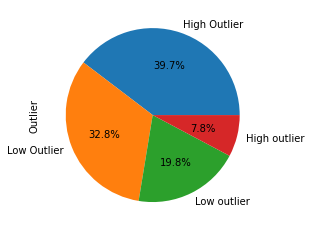

In [44]:
all_data['Outlier'].value_counts(normalize=True).plot.pie(autopct="%1.1f%%")

#### Remarque:  
Nous remarquons que cette variable, si elle est mentionnée, elle indique à quel point la donnée (ligne) est un outlier (high / low). Nous allons donc supprimer les lignes qui sont indiquées comme outlier, ensuite supprimer la variable. 

In [45]:
#supprimer les lignes indiquée comme outliers
clean_data = all_data[all_data['Outlier'].isnull()] 
#supprimer la variable "outlier"
clean_data  = clean_data.drop(['Outlier'], axis=1)
clean_data.shape

(6600, 44)

Nous avons supprimer 116 lignes (6716 --> 6600)  


## 2.2. YearsENERGYSTARCertified <a class="anchor" id="2.2"></a>    


Vérifions maintenant la colonne "YearsENERGYSTARCertified" qui contient 96,59% des valeurs manquantes. Egalement, pas de documentation est fournie pour cette variable.


In [46]:
clean_data['YearsENERGYSTARCertified'].value_counts()

2016                                              33
2014                                              12
2017                                               9
2009                                               8
2016, 2015                                         8
                                                  ..
2016, 2015, 2014, 2013, 2012, 2010, 2009, 2008     1
2015, 2014, 2013, 2011, 2009, 2008                 1
2016201320122011201020092008                       1
2016, 2015, 2014, 2013, 2011, 2009                 1
2016, 2015, 2012, 2009                             1
Name: YearsENERGYSTARCertified, Length: 116, dtype: int64

Normalement, cette variable nous indique l'année de certification EnergyStar. Les données nécessite un prétraitement puisque les années sont parfois attachée. Je pense que c'est inutile de les nettoyer puisque selon l'objectif du projet, cette information est inutile. nous allons donc la supprimer. 

In [47]:
clean_data  = clean_data.drop(['YearsENERGYSTARCertified'], axis=1)
clean_data.shape

(6600, 43)

## 2.3. BuildingType 	 <a class="anchor" id="2.3"></a>     
Le but du projet restreint l'analyse aux bâtiments non destinés à l’habitation. Nous allons donc filtrer les habitations. Commençons par analyser leurs types. 

<AxesSubplot:ylabel='OSEBuildingID'>

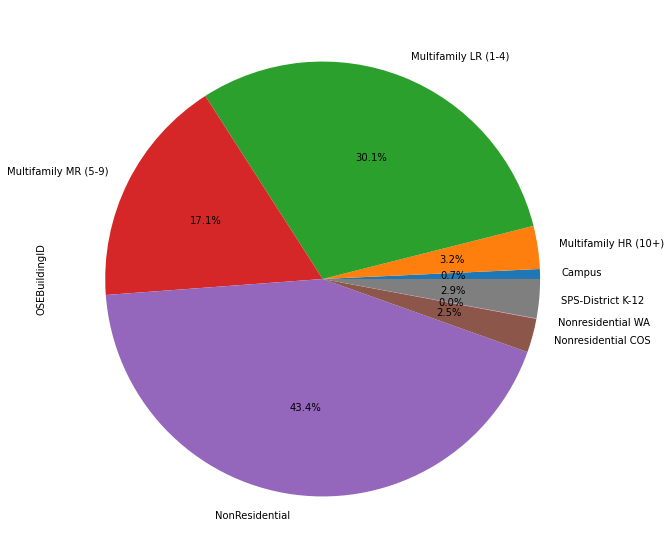

In [48]:
building_type = clean_data.groupby(by='BuildingType')['OSEBuildingID'].nunique()
plt.figure(figsize=(12,10))
building_type.plot.pie(autopct="%1.1f%%")

### Remarques:  
Nous remarquons que la majorité des batiments (46%) sont de type non résidentiel. Nous allons filterer notre dataset pour ne garder que les batiment de type non résidentiel, ensuite, nous analysons leur type d'usage.

In [49]:
list=['NonResidential','Nonresidential COS','Nonresidential WA']
clean_data = clean_data[clean_data['BuildingType'].isin (list)]
clean_data.shape

(3030, 43)

## 2.4.  PrimaryPropertyType	 <a class="anchor" id="2.4"></a>    
C'est l'utilisation principale d'une propriété (par exemple, un bureau, un magasin de détail). L'usage principal est défini comme une fonction qui représente plus de 50 % d'un bien

In [50]:
#afficher la totalité des types d'usage présents
primary_property_types = sorted(clean_data['PrimaryPropertyType'].unique())
print ("le nombre des types d'usage est :", len(primary_property_types))
primary_property_types


le nombre des types d'usage est : 29


['College/University',
 'Distribution Center',
 'Distribution Center\n',
 'Hospital',
 'Hotel',
 'K-12 School',
 'Laboratory',
 'Large Office',
 'Low-Rise Multifamily',
 'Medical Office',
 'Mixed Use Property',
 'Non-Refrigerated Warehouse',
 'Office',
 'Other',
 'Refrigerated Warehouse',
 'Residence Hall',
 'Residence Hall/Dormitory',
 'Restaurant',
 'Restaurant\n',
 'Retail Store',
 'Self-Storage Facility',
 'Self-Storage Facility\n',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket / Grocery Store',
 'Supermarket/Grocery Store',
 'University',
 'Warehouse',
 'Worship Facility']

Nous remarquons qu'il y a redondance dans certains type parcequ'ils ne sont pas normalisés (ajout d'espace, "/", \n). Nous allons les normaliser.

In [51]:
import re
regex = re.compile(r'[\n\r\t]')
clean_data['PrimaryPropertyType'] = [regex.sub("", item) for index, item in clean_data.PrimaryPropertyType.iteritems()]

In [52]:
#revérifier les types d'usage
primary_property_types = sorted(clean_data['PrimaryPropertyType'].unique())
print ("le nombre des types d'usage est :", len(primary_property_types))
primary_property_types


le nombre des types d'usage est : 26


['College/University',
 'Distribution Center',
 'Hospital',
 'Hotel',
 'K-12 School',
 'Laboratory',
 'Large Office',
 'Low-Rise Multifamily',
 'Medical Office',
 'Mixed Use Property',
 'Non-Refrigerated Warehouse',
 'Office',
 'Other',
 'Refrigerated Warehouse',
 'Residence Hall',
 'Residence Hall/Dormitory',
 'Restaurant',
 'Retail Store',
 'Self-Storage Facility',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket / Grocery Store',
 'Supermarket/Grocery Store',
 'University',
 'Warehouse',
 'Worship Facility']

In [53]:
#encore une autre étape de normalisation ('Supermarket / Grocery Store','Supermarket/Grocery Store')
regex=re.compile(r' / ')
clean_data['PrimaryPropertyType'] = [regex.sub("/", item) for index, item in clean_data.PrimaryPropertyType.iteritems()]

In [54]:
#revérifier les types d'usage
primary_property_types = sorted(clean_data['PrimaryPropertyType'].unique())
print ("le nombre des types d'usage est :", len(primary_property_types))
primary_property_types

le nombre des types d'usage est : 25


['College/University',
 'Distribution Center',
 'Hospital',
 'Hotel',
 'K-12 School',
 'Laboratory',
 'Large Office',
 'Low-Rise Multifamily',
 'Medical Office',
 'Mixed Use Property',
 'Non-Refrigerated Warehouse',
 'Office',
 'Other',
 'Refrigerated Warehouse',
 'Residence Hall',
 'Residence Hall/Dormitory',
 'Restaurant',
 'Retail Store',
 'Self-Storage Facility',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket/Grocery Store',
 'University',
 'Warehouse',
 'Worship Facility']

#### Remarque:  
Nous constatons qu'après le filtrage selon le type de batiments non résidentiel, on passe de 6600 lignes à 3030 lignes. 

## 2.5. YearBuilt 	 <a class="anchor" id="2.5"></a>    
Nous allons voir les distributions des années de construction des bâtiments.

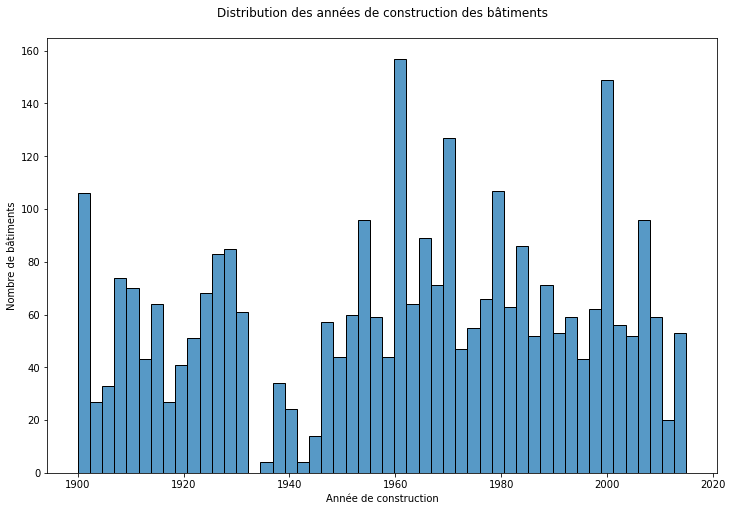

In [55]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=clean_data, x='YearBuilt', bins=50)
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n")
plt.show()


### Remarque:  
Nous remarquon que la majorité des batiments sont construites en 1960.  
Je pense que cette information peut être très utile pour prédire le taux de consommation de l'énergie, parce que l'âge du batiment est très important. C'est pourquoi, je vais créer une nouvelle variable, plus utile que l'année de construction, et c'est l'âge du batiment. Ensuite je vais supprimer la colonne "YearBuilt".

In [56]:
#création d'une nouvelle variable "Building_age"
clean_data['Building_age'] = clean_data['DataYear'] - clean_data['YearBuilt']
clean_data.drop('YearBuilt', axis=1, inplace=True)


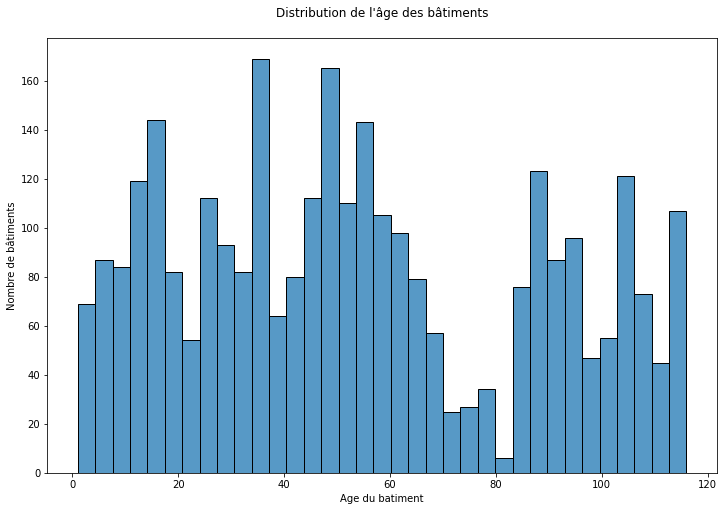

In [57]:
#revérifier la distribution de Building_age
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=clean_data, x='Building_age', bins=35)
ax.set_xlabel("Age du batiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n")
plt.show()


#### Remarque:  
Nous remarquons que la majorité des batiments datent depuis 35 ans. 

## 2.6. Electricity / NaturalGas	 <a class="anchor" id="2.6"></a>   
- Electricity: C'est la quantité annuelle d’électricité consommée par le batiment.  
- NaturalGas: Quantité annuelle de gaz naturel fourni par les services publics consommée par la propriété.
  
  
- Nous remarquons que ces deux variables semblent redondantes: Electricity(kWh) et Electricity(kBtu)/ NaturalGas(therms) et NaturalGas(kBtu).
Pour mieux comprendre les mesures utilisées, j'ai fait cette petite recherche:  
les acronymes utilisés dans les colonnes:

    GHG: greenhouse gas emissions, correspond aux émissions des gazs à effets de serre.
    OSE: Seattle Office of Sustainability and Environment.
    EUI: Energy Use Intensity.
    kBtu: kilo-British thermal unit, 1 kWh = 3.412 kBtu.
    sf: square feet, 1m² = 10,7639sf.
    WN: weather-normalized, normalisé vis à vis des conditions climatiques.
    GFA: Gross floor area, Surface de plancher brute - La surface de plancher couverte (par un toit, même sans mur) totale contenue dans le bâtiment.
    therm: mesure énergétique 1thm =100000Btu.  
 
 Pour vérifier si chaque couple de variables présentent le même feature, nous proposons de vérifier si elles ont une relations linéaires.   
    

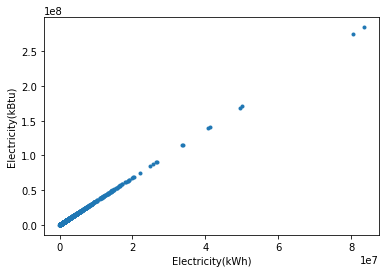

In [58]:
#vérifier la linéarité entre Electricity(kWh) et Electricity(kBtu)
plt.plot(clean_data['Electricity(kWh)'],clean_data['Electricity(kBtu)'],'.')
plt.xlabel('Electricity(kWh)')
plt.ylabel('Electricity(kBtu)')
plt.show()

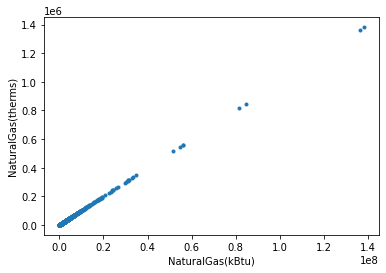

In [59]:
#vérifier la linéarité entre NaturalGas(therms) et NaturalGas(kBtu)
plt.plot(clean_data['NaturalGas(kBtu)'],clean_data['NaturalGas(therms)'],'.')
plt.xlabel('NaturalGas(kBtu)')
plt.ylabel('NaturalGas(therms)')
plt.show()

### Remarques:  
C'est bien le cas, chaque deux variables vérifient une relation de linéarité entre eux. Nous décidons donc de garder que les variables mesurée en KBtu pour rester en homogénité avec les autres mesures de notre dataset. Supprimons donc les variables mesurées par d'autres unités.

In [60]:
redundant_vars = ['NaturalGas(therms)','Electricity(kWh)']
clean_data.drop(redundant_vars, axis=1, inplace=True)

In [61]:
clean_data.shape

(3030, 41)

### Remarque  
Après avois supprimer les colonnes redondantes, nous sommes passés de 43 variables vers 41 variables.

## 2.7. SiteEUIWN(kBtu/sf) - SourceEUIWN(kBtu/sf) - SiteEnergyUseWN(kBtu) <a class="anchor" id="2.7"></a>   
 Les suffixes WN : "Weather Normalized": ce sont les mesures normalisées avec les conditions climatiques. Dans le cadre de notre analyse, la météo ne sera pas pris en compte puisque l'émission de gaz à effet de serre est liée de façon directe à la consommation d'énergie. Nous allons donc supprimer les variables contenant ce préfixe. Pour automatiser cette opération, nous allons définir une méthode qui le fait et qui prend en paramètre le df et le suffixe à supprimer (une telle fonction pourra nous être utile dans les prochains projets.

In [62]:
#fonction qui cherche les variables contenant le suffixe en question
def search_var(df, suffix):
  vars_to_drop = []
  for col in df.columns:
      if suffix in col: 
        vars_to_drop.append(col)
  return vars_to_drop

In [63]:
#supprimer les variables contenant le suffixe ""WN
clean_data.drop(search_var(clean_data,'WN'), axis=1, inplace=True)

In [64]:
clean_data.shape

(3030, 38)

### Remarque  
Après avois supprimer les colonnes contenant le suffixe "WN", nous sommes passés de 41 variables vers 38 variables.

## 2.8. Neighborhood <a class="anchor" id="2.8"></a>   
Présente le quartier. 

In [65]:
neighborhood_list= clean_data['Neighborhood'].unique()
print(neighborhood_list)
print("le nombre de quartiers est ", len(neighborhood_list))

['DOWNTOWN' 'NORTHEAST' 'EAST' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'MAGNOLIA / QUEEN ANNE' 'CENTRAL' 'SOUTHWEST' 'SOUTHEAST'
 'NORTH' 'DELRIDGE' 'North' 'Delridge' 'Ballard' 'Northwest' 'Central'
 'DELRIDGE NEIGHBORHOODS']
le nombre de quartiers est  19


### Remarque:  
Nous remarquons qu'il y a des valeurs redondantes avec changement de casse. Nettoyons les en les remettant tous en majuscule. 

In [66]:
#Neighborhood du minuscule en majuscule
clean_data['Neighborhood'] = clean_data['Neighborhood'].apply(lambda x : x.upper())

In [67]:
#revérifier "Neighborhood" après nettoyage
neighborhood_list= clean_data['Neighborhood'].unique()
print(neighborhood_list)
print("le nombre de quartiers est ", len(neighborhood_list))

['DOWNTOWN' 'NORTHEAST' 'EAST' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'MAGNOLIA / QUEEN ANNE' 'CENTRAL' 'SOUTHWEST' 'SOUTHEAST'
 'NORTH' 'DELRIDGE' 'DELRIDGE NEIGHBORHOODS']
le nombre de quartiers est  14


## 2.9. Les variables quantitatives <a class="anchor" id="2.9"></a>  
Les deux variables à prédire dans notre projet:
   - Consommation d'énergie du bâtiment (SiteEnergyUse(kBtu)  
   - Emissions de CO2 (TotalGHGEmissions)    


- surface bati brute du batiment et du parking (PropertyGFATotal)
- la consommation d’énergie de la propriété divisée par sa superficie brute. (SourceEUI(kBtu/sf)
- La quantité annuelle de vapeur de district consommée (SteamUse(kBtu))
- consommation d’énergie du site d’une propriété divisée par sa superficie brute.(SiteEUI(kBtu/sf)
- Sore entre 1 à 100 qui évalue le rendement énergétique global d’une propriété (ENERGYSTARScore)

Vérifions la distribution de ces variables, leur normalité, et si elles contiennent des outliers ou des valeurs manquantes. 

In [68]:
quantitative_vars = ['PropertyGFATotal', 'SourceEUI(kBtu/sf)', \
                       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',\
                       'Electricity(kBtu)', 'SiteEUI(kBtu/sf)', \
                       'TotalGHGEmissions', 'GHGEmissionsIntensity', \
                       'NaturalGas(kBtu)', 'ENERGYSTARScore']

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


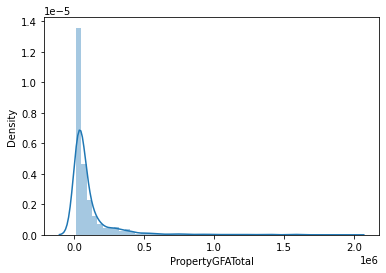

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


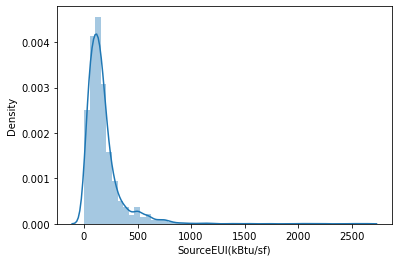

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


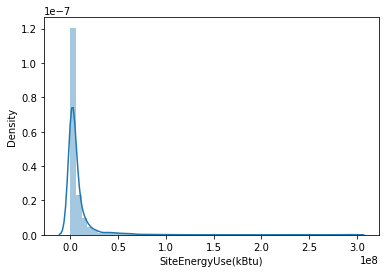

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


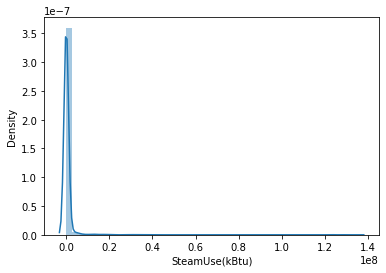

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


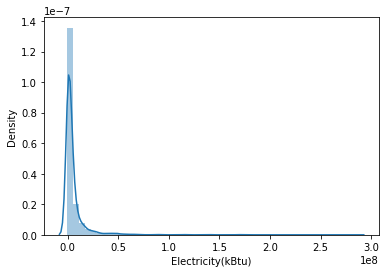

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


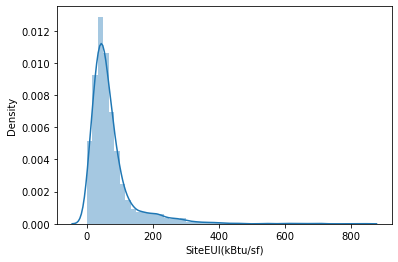

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


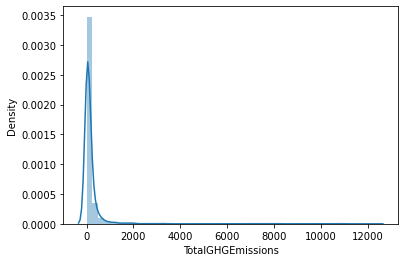

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


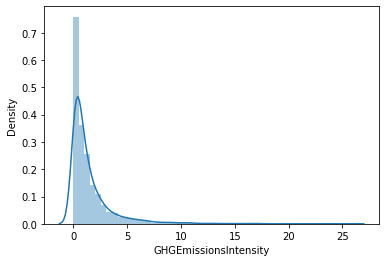

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


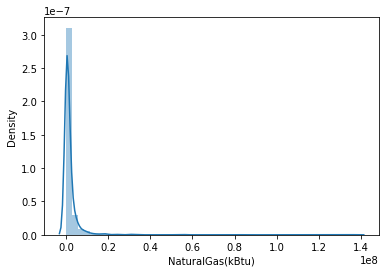

<Figure size 864x432 with 0 Axes>

/home/soumaya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


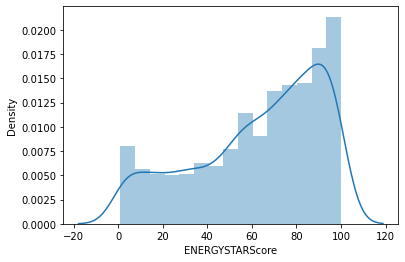

<Figure size 864x432 with 0 Axes>

In [69]:
#afficher la distributions des variables quantitatives
for var in quantitative_vars:
    sns.distplot(clean_data[var], label=var)
    plt.figure(figsize=(12,6))
    plt.show()

### Remarques:  
Nous remarquons que toutes les variables, à l'exception de ENERGYSTARScore, suivent une distribution normale. Vérifions la présence des outliers en les affichant en boxplots.

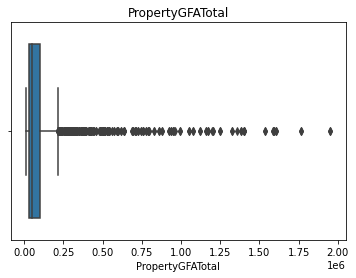

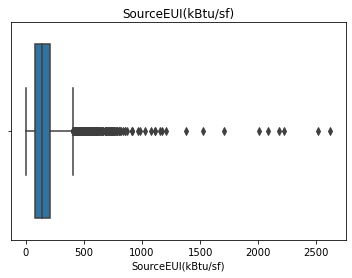

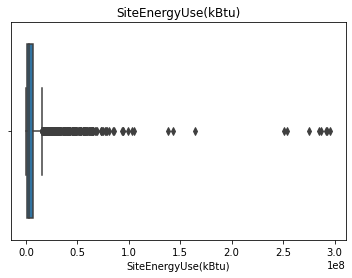

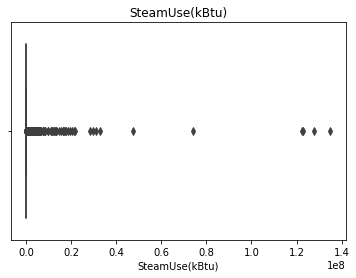

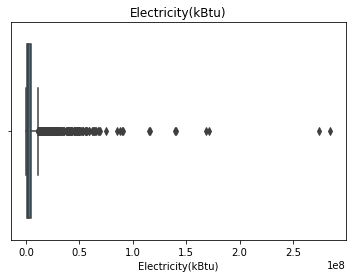

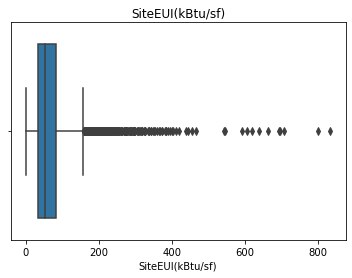

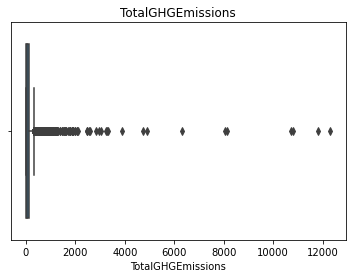

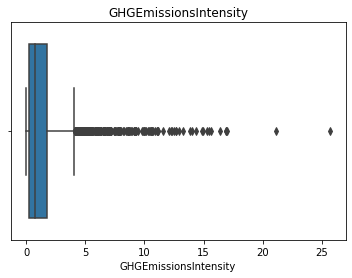

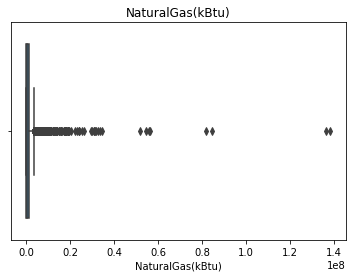

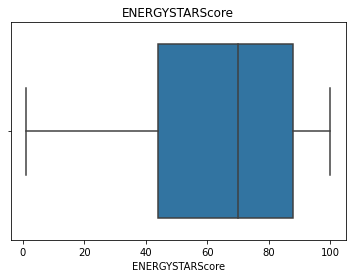

In [70]:
for var in quantitative_vars:
    sns.boxplot(x=var, data=clean_data)
    plt.title(var)
    plt.show()

In [71]:
for var in quantitative_vars:
    print('\ndans ',var, 'les statistiques sont\n', clean_data[var].describe())


dans  PropertyGFATotal les statistiques sont
 count    3.030000e+03
mean     1.117206e+05
std      1.920719e+05
min      1.128500e+04
25%      2.880000e+04
50%      4.736800e+04
75%      1.027610e+05
max      1.952220e+06
Name: PropertyGFATotal, dtype: float64

dans  SourceEUI(kBtu/sf) les statistiques sont
 count    3027.000000
mean      179.468252
std       181.437779
min         0.000000
25%        79.599999
50%       138.000000
75%       210.050000
max      2620.000000
Name: SourceEUI(kBtu/sf), dtype: float64

dans  SiteEnergyUse(kBtu) les statistiques sont
 count    3.027000e+03
mean     7.589964e+06
std      1.867578e+07
min      0.000000e+00
25%      1.187390e+06
50%      2.566219e+06
75%      6.948314e+06
max      2.958126e+08
Name: SiteEnergyUse(kBtu), dtype: float64

dans  SteamUse(kBtu) les statistiques sont
 count    3.027000e+03
mean     5.007096e+05
std      5.225099e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.34

#### Remarques:   

Nous remarquons qu'il y a des outliers. Cette observation est encore prouvée par la fonction describe().  
Les variables 'GHGEmissionsIntensity', 'TotalGHGEmissions'et Electricity(kBtu) contiennent des valeurs négatives. Nous allons les supprimer. Ensuite nous allons normaliser les variables qui ont des extrémité exponentiennes (NaturalGas(kBtu), Electricity(kBtu), SteamUse(kBtu), SiteEnergyUse(kBtu), PropertyGFATotal)

In [72]:
# supprimer les lignes qui contiennent des valeurs inférieurs ou égale à zéro
to_clean_negative_values= ['TotalGHGEmissions','GHGEmissionsIntensity']
for var in to_clean_negative_values:
    cleaned_rows = clean_data[clean_data[var] < 0]
    if (cleaned_rows.shape[0]>0) :
        print(var)
        display(cleaned_rows)
        clean_data.drop(cleaned_rows.index, inplace=True)

TotalGHGEmissions


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Latitude,Longitude,Address,City,State,zip,Building_age
6546,49784,2016,NonResidential,Small- and Mid-Sized Office,Bullitt Center,7234600195,3,CENTRAL,1.0,6.0,52000,0,52000,Office,Office,48159.0,NaN,NaN,NaN,NaN,100.0,7.1,2.0,342726.0938,0.0,-115417.0,0.0,-0.8,-0.02,False,Compliant,47.61432,-122.31257,1501 E. Madison St.,Seattle,WA,98122.0,3


In [73]:
clean_data.shape

(3029, 38)

In [75]:
vars_to_clean=['NaturalGas(kBtu)', 'Electricity(kBtu)', 'SteamUse(kBtu)', 'SiteEnergyUse(kBtu)', 'PropertyGFATotal']
for var in vars_to_clean:
    new_clean_data = my_module.find_outliers(clean_data, var)

In [76]:
for var in quantitative_vars:
    print('\ndans ',var, 'les statistiques sont\n', new_clean_data[var].describe())


dans  PropertyGFATotal les statistiques sont
 count      2665.000000
mean      58309.149343
std       42985.437521
min       11285.000000
25%       27420.000000
50%       41478.000000
75%       74211.000000
max      213283.000000
Name: PropertyGFATotal, dtype: float64

dans  SourceEUI(kBtu/sf) les statistiques sont
 count    2662.000000
mean      170.812885
std       166.785809
min         0.000000
25%        73.500000
50%       129.350000
75%       200.425000
max      2620.000000
Name: SourceEUI(kBtu/sf), dtype: float64

dans  SiteEnergyUse(kBtu) les statistiques sont
 count    2.662000e+03
mean     3.894157e+06
std      5.275991e+06
min      0.000000e+00
25%      1.087013e+06
50%      2.100157e+06
75%      4.751017e+06
max      6.674038e+07
Name: SiteEnergyUse(kBtu), dtype: float64

dans  SteamUse(kBtu) les statistiques sont
 count    2.662000e+03
mean     1.301662e+05
std      1.122092e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max  

# Questions:  
1. est-ce qu'on doit normaliser ou standardiser?
2. quand normaliser et quand standardiser?  
3. comment faire le choix de la statégie à utiliser? 

## 2.10. Vérification des lignes vides  <a class="anchor" id="2.10"></a>    
Dans cette partie, je vais vérifier s'il existe des lignes contenant beaucoup de données manquantes. Si oui, je vais les supprimer. 

In [77]:
#définir une fonction qui affiche un histogramme des pourcentage de nans pour les lignes de dataframe
def nans_rows_hist (dataframe):
    df=pd.DataFrame(columns = ['row_index', 'percentage_of_NaNs'])
    for i,row in dataframe.iterrows():
        percentage_nans = round((dataframe.loc[[i]].isna().sum().sum()/dataframe.shape[1])*100,2)
        new_row={'row_index':i,
                 'percentage_of_NaNs':percentage_nans}
        df=df.append(new_row, ignore_index=True)
    df.sort_values(by='percentage_of_NaNs',inplace=True)
    #f.plot(kind='bar',x='row_index', stacked=False,rot=45,figsize=(20,6))
    df['percentage_of_NaNs'].hist(bins=20)
    plt.show()
  

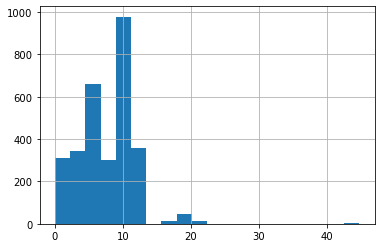

In [78]:
nans_rows_hist(clean_data)

### Remarque:  
Nous remarquons que que la majorité des lignes ayant des valeurs manquantes ont à peu près 10% des Nans. Nous remarquons aussi que le pourcentage maximal des valeurs manquantes est à peut près de 45%. En plus , ce pourcentage est de très faible fréquence. Nous décidons donc de garder ces lignes et ne pas les filtrer selon leur pourcentage de valeurs manquantes.

## 3. Analyse statistique <a class="anchor" id="3."></a>   

## 3.1. Analyse univariée <a class="anchor" id="3.1"></a>   
Dans cette partie, nous allons faire l'analyse univariée des variables qualitatives et des variables quantitatives.

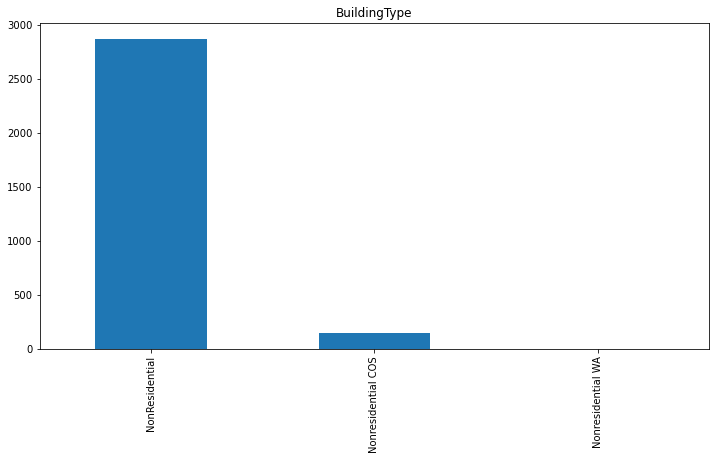

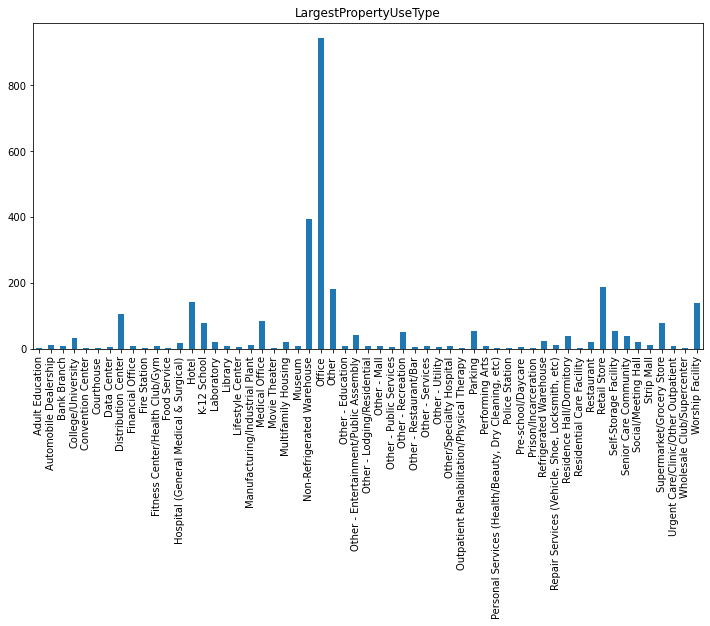

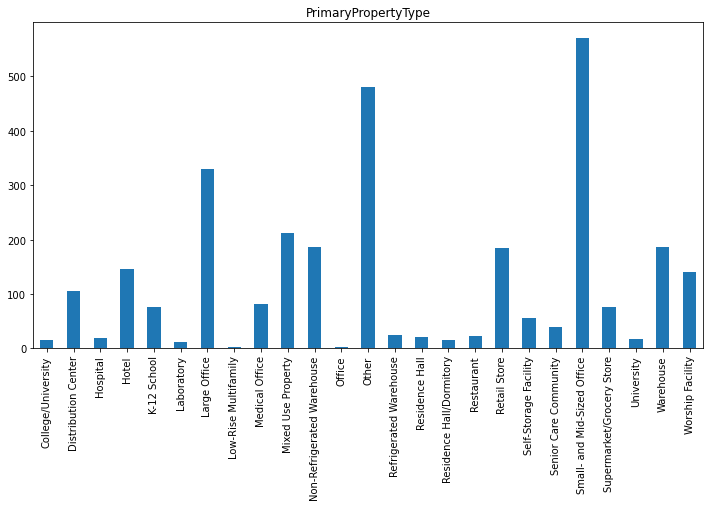

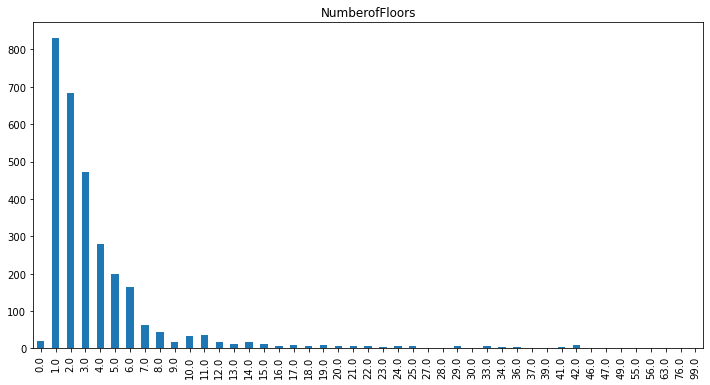

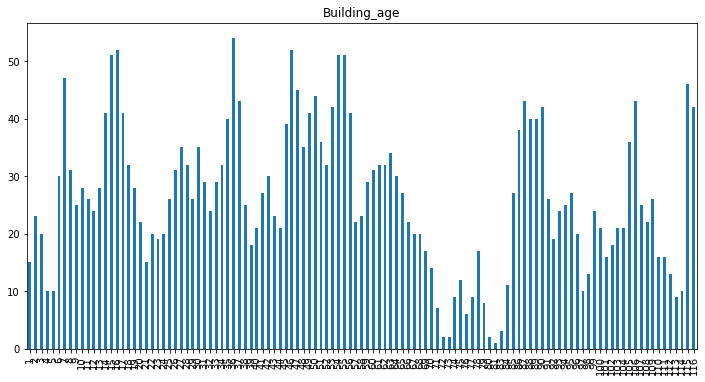

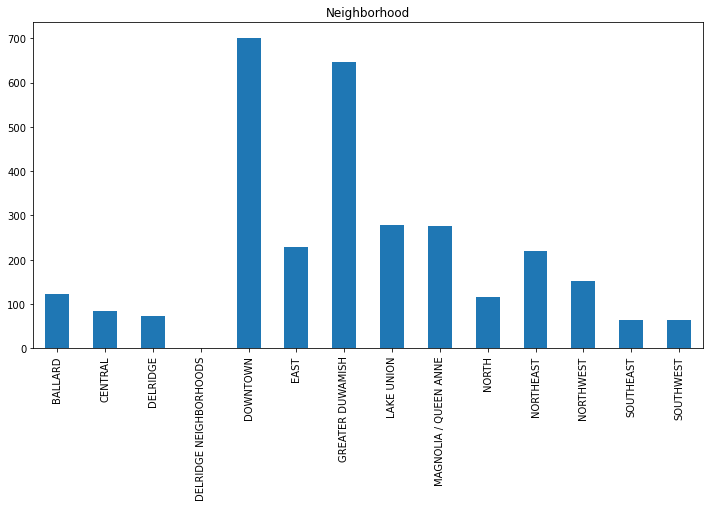

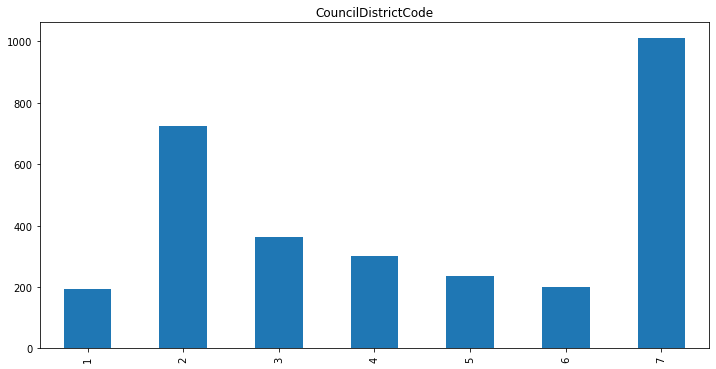

In [85]:
#analyse des variables qualitatives
qualitative_vars = ['BuildingType', 'LargestPropertyUseType', 'PrimaryPropertyType', \
                    'NumberofFloors','Building_age', 'Neighborhood', 'CouncilDistrictCode']
for column in qualitative_vars:
    fig = plt.figure(figsize=(12,6))
    clean_data[column].value_counts().sort_index(axis=0).plot(kind='bar')
    plt.title(column)
    plt.show()

### Remarques:  
1. Nous remarquons que les types de batiments les plus fréquents sont des batiments non résidentiel de type bureaux.   
2. La majorité des batiments sont des batiments à un seul étage  
3. La construction des batiments a diminué dans les 5 dernières année (notre repère ici est l'années où le dataset est établi). Ceci peut être expliqué par le manque de terrain libre pour batir.   
4. Il y a des quartiers qui sont très peu renseignés (telque Deliridge Neighberhood). Ceci peut être un quartier résidentiel qu'on a filtré lors de nettoyage de données. Cette assymétrie est beacoup moins visible dans 'council District Code)

Text(0.5, 1.0, 'Classement des 15 propriétés les plus fréquents')

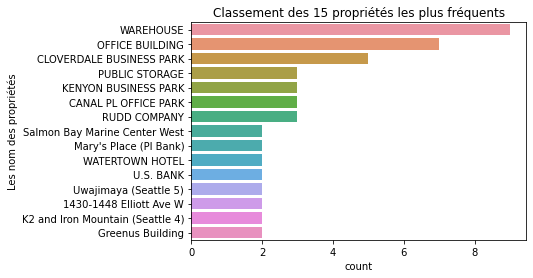

In [86]:
#visualisation des propriétés les plus fréquentes
plt.figure(figsize=(6, 4))
sns.countplot(y="PropertyName", data=clean_data, order=pd.value_counts(clean_data['PropertyName']).iloc[:15].index)
plt.ylabel("Les nom des propriétés")
plt.title("Classement des 15 propriétés les plus fréquents")

### Remarque:  
Les propriétés les plus fréquentes dans le dataset sont les entrepôts et les magasins. 

In [ ]:
#analyse des variables quantitatives
#dejà fait, dois je le refaire ici?

## 3.2. Analyse multivariée <a class="anchor" id="3.2"></a>   

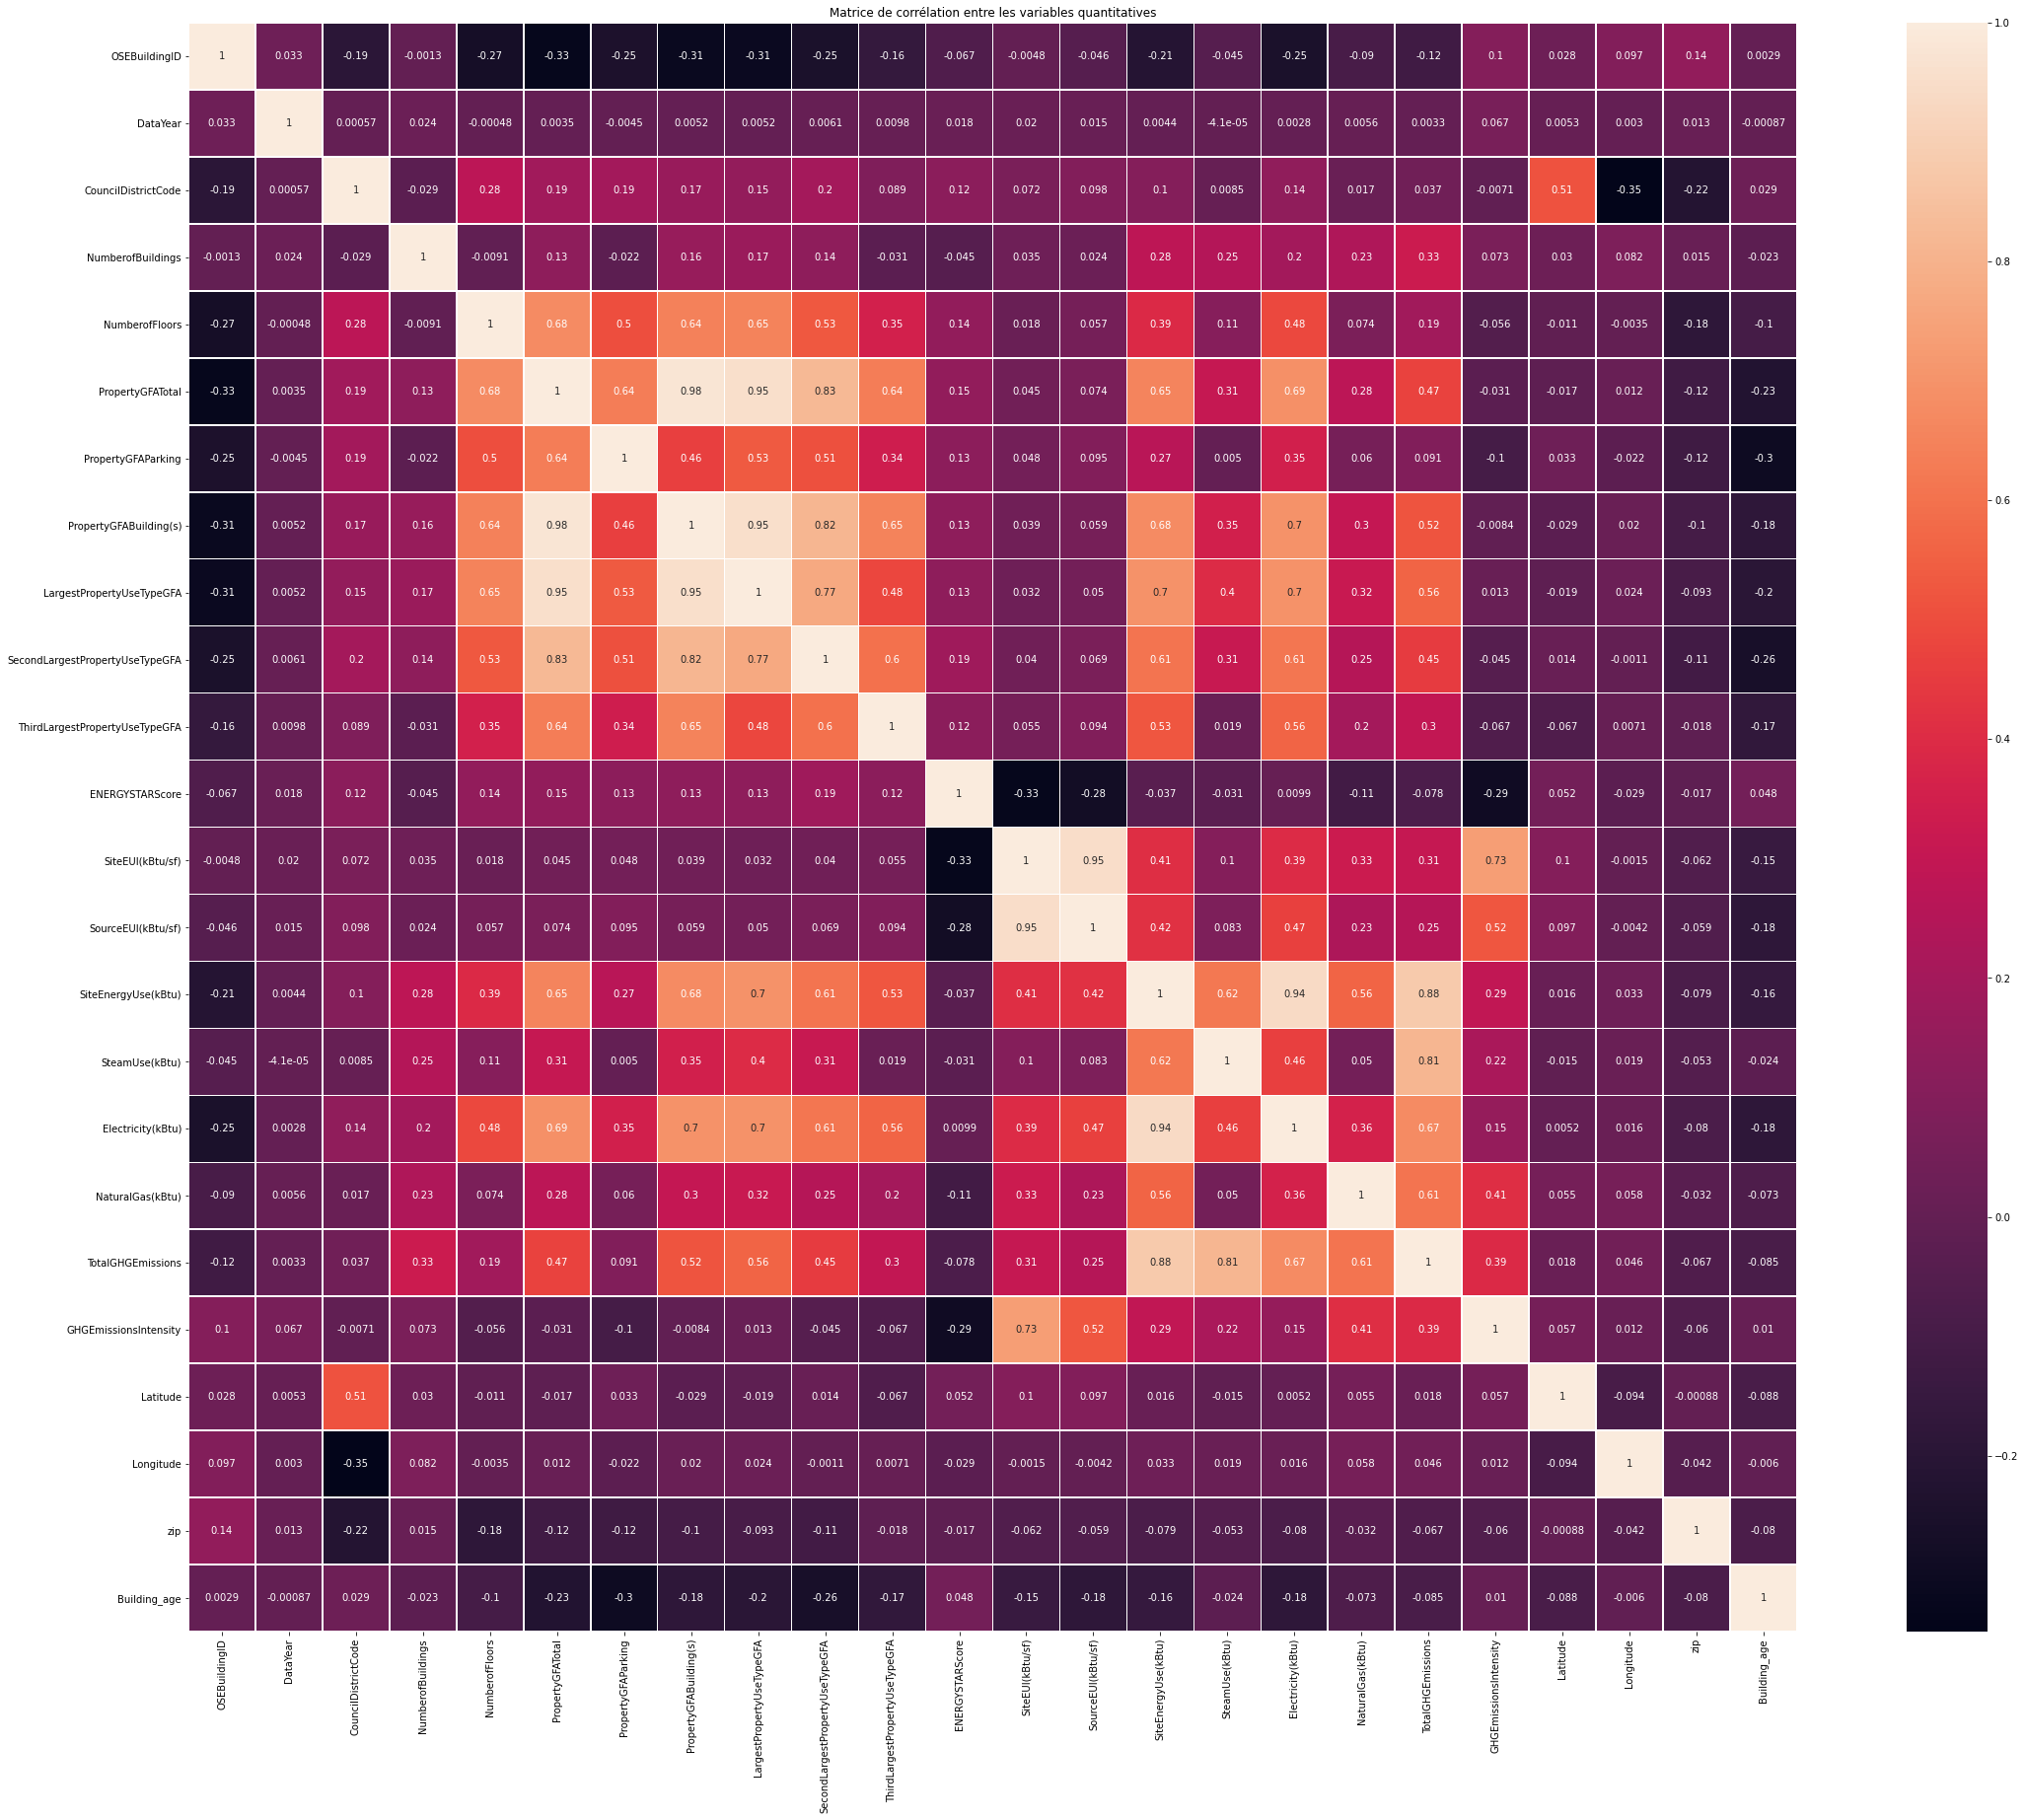

In [93]:
# corrélation entre tous les variables quantitatives
corr_df = clean_data.corr()
plt.figure(figsize=(40, 30))
sns.heatmap(corr_df, annot=True,square=True,linewidths=.5)
plt.title("Matrice de corrélation entre les variables quantitatives")
plt.show()

### Remarques:  
Nous remarquons des corrélations fortes entre :
- propertyGFABuilging(s) et PropertyGFATotal --> corr= 0.98  
- LargestPropertyUseTypeGFA et PropertyGFATotal --> corr= 0.95
- LargestPropertyUseTypeGFA et propertyGFABuilging(s) --> corr = 0.95 
- SiteEUI(kbtu/sf) et SourceEUI(kbtu/sf) --> corr = 0.95
- SiteEnergyUse(kbtu/sf) et electrecity(kbtu/sf)  --> corr = 0.94  
- etc.

Je propose de filtrer uniquement les colonnes dont leur corrélation est supérieur à 0.8. Ensuite les afficher en paiplot.

In [94]:
#selectionner les feautures/variables corrélées
corr = clean_data.corr()
corr_features = corr.columns[((corr < 1) & (corr > 0.8)).any(axis=0)]
corr_features

Index(['PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'TotalGHGEmissions'],
      dtype='object')

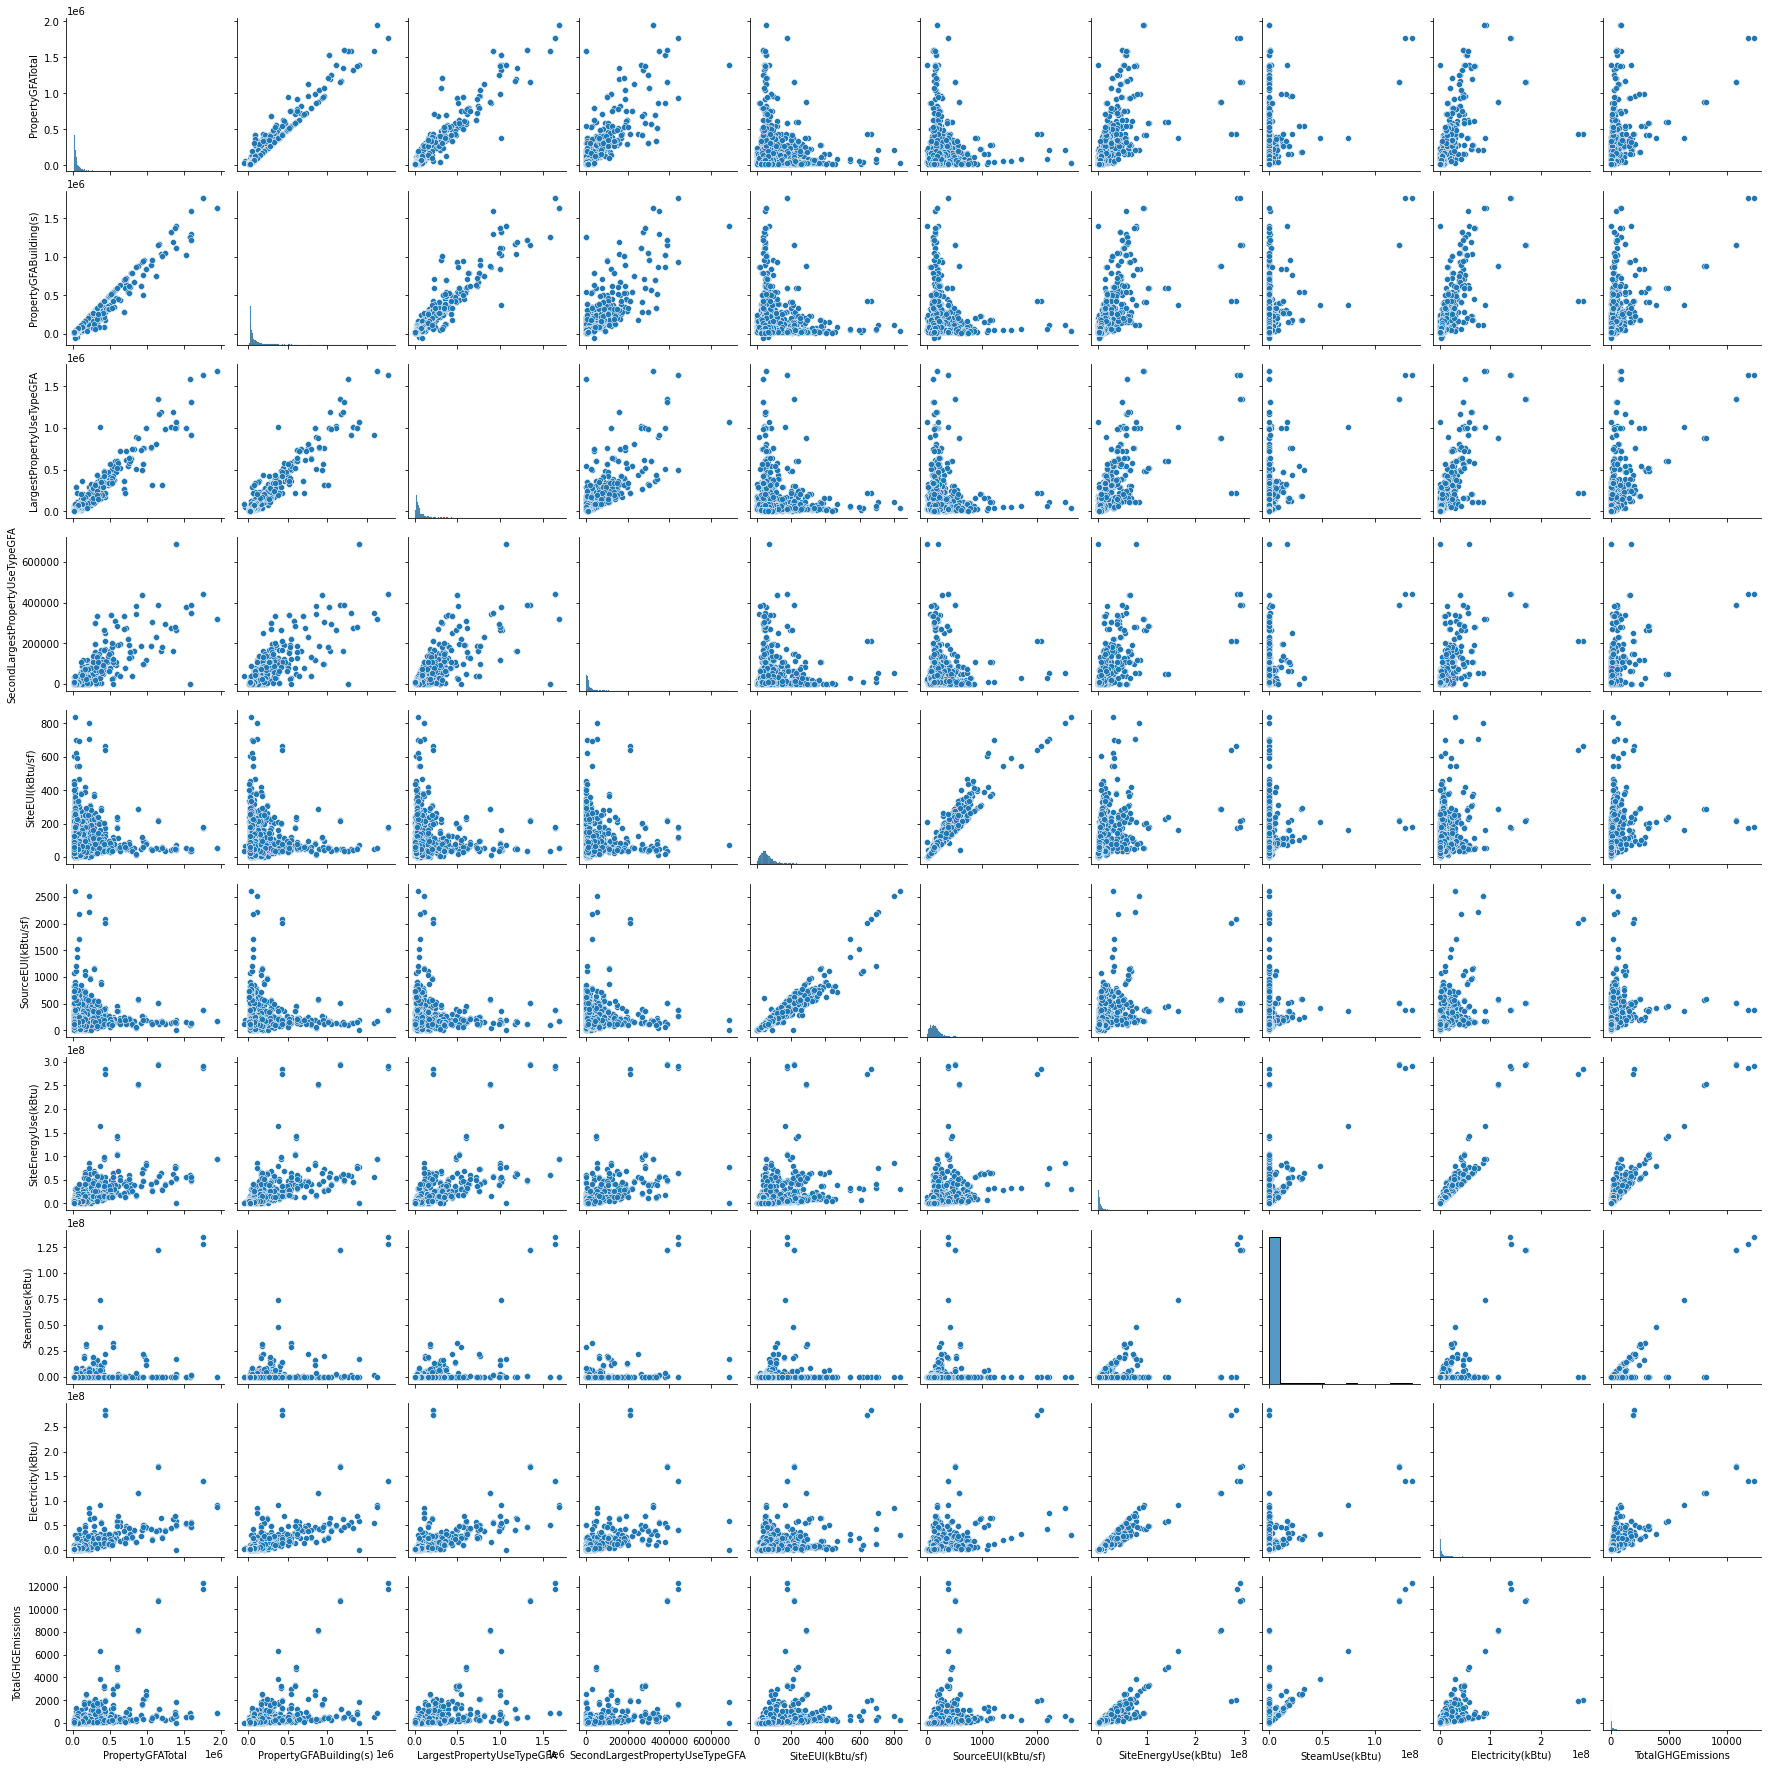

In [96]:
#afficher le pairplot des features corrélées
sns.pairplot(clean_data[corr_features])

### Remarques:  
On constate qu'il y a des relations de linéarité entre différentes variables:  
- PropertyGFATotal et PropertyGFABuilding(s)/LargestPropertyUseTypeGFA  
- SiteEnergyUse(kBtu) et TotalGHGEmissions/Electricity(kBtu)  
- etc 